In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import mplleaflet
import geopandas as gpd

import pandas as pd
from shapely.geometry import Point

In [36]:
cttowns = gpd.read_file("shapes/topojson/towns.topojson")
cttowns.crs = {'init' :'epsg:4326'}
cttowns = cttowns.to_crs(epsg=2234)
cttowns = cttowns[cttowns["ALAND10"] != 0]
cttowns.head()

,id,STATEFP10,COUNTYFP10,COUSUBFP10,COUSUBNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,...,NECTAFP10,NCTADVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,GEOID_AFF2,GEOID_AFF1,geometry
1,None,09,001,04720,00213390,0900104720,Bethel,Bethel town,43,T1,...,72850,,A,43741119,100805,+41.3697777,-073.3895032,0600000US0900104720,06000US0900104720,"POLYGON ((820112.800402383 717430.8690976738, ..."
2,None,09,001,08070,00213396,0900108070,Bridgeport,Bridgeport town,43,T5,...,71950,,C,41372169,8719037,+41.1873858,-073.1957339,0600000US0900108070,06000US0900108070,"POLYGON ((864063.4414547632 643680.3094610407,..."
3,None,09,001,08980,00213399,0900108980,Brookfield,Brookfield town,43,T1,...,72850,,A,51211648,1543913,+41.4698845,-073.3936666,0600000US0900108980,06000US0900108980,"POLYGON ((814461.2360275936 730461.0863016383,..."
4,None,09,001,18500,00213415,0900118500,Danbury,Danbury town,43,T5,...,72850,,C,108499386,5829369,+41.4018389,-073.4722848,0600000US0900118500,06000US0900118500,"POLYGON ((820112.800402383 717430.8690976738, ..."
5,None,09,001,18850,00213416,0900118850,Darien,Darien town,43,T1,...,71950,,A,32777323,28024048,+41.0521498,-073.4797138,0600000US0900118850,06000US0900118850,"POLYGON ((793125.5835487371 603314.4210137732,..."


In [37]:
ctroads = gpd.read_file("shapes/topojson/roads.topojson")
ctroads.crs = {'init' :'epsg:4326'}
ctroads = ctroads.to_crs(epsg=2234)
ctroads.head()

,id,STATEFP,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,None,09,1102223513793,E Main St,M,S1200,LINESTRING (899281.1863276762 634053.781026359...
1,None,09,1102223479781,State Hwy 110,S,S1200,LINESTRING (899281.1863276762 634053.781026359...
2,None,09,1102223464115,Post Rd,M,S1200,LINESTRING (861537.9105044213 613989.030760478...
3,None,09,110704717650,State Hwy 137,S,S1200,LINESTRING (781244.2436426245 581990.601280640...
4,None,09,1102223477258,Henry Mucci Hwy,M,S1100,LINESTRING (876931.6929352403 652906.447289461...


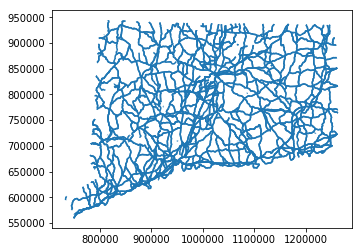

In [38]:
ctroads.plot()

### Let's look at the different types of roads

The map above is pretty dense, so let's break it down

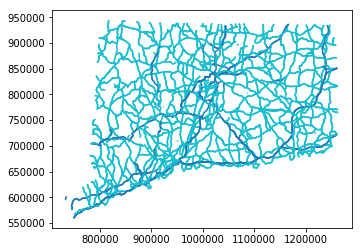

In [60]:
ctroads.plot(column="MTFCC")

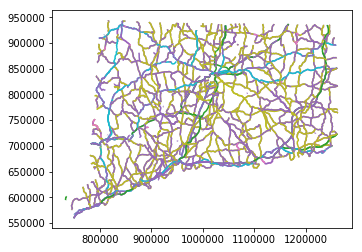

In [40]:
ctroads.plot(column="RTTYP")

In [41]:
# It looks like MTFCC only has a couple values
ctroads["MTFCC"].value_counts()

S1200    4068
S1100     479
Name: MTFCC, dtype: int64

### Here's what I found about these classifications

S1100 and S1200 are defined here:

https://www.census.gov/geo/reference/mtfcc.html

S1100 - Primary roads are generally divided, limited-access highways within the interstate highway system or under state management, and are distinguished by the presence of interchanges. These highways are accessible by ramps and may include some toll highways
    
    
S1200 - Secondary roads are main arteries, usually in the U.S. Highway, State Highway or County Highway system. These roads have one or more lanes of traffic in each direction, may or may not be divided, and usually have at-grade intersections with many other roads and driveways. They often have both a local name and a route number.


In [42]:
ctroads["RTTYP"].value_counts()

M    2733
S    1361
U     261
I     105
O      80
        7
Name: RTTYP, dtype: int64

In [43]:
primary_roads = ctroads[ctroads["MTFCC"] == "S1100"]

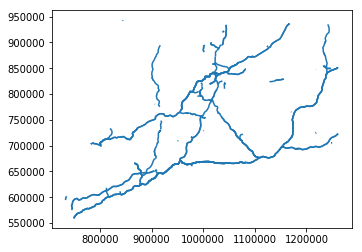

In [58]:
primary_roads.plot()

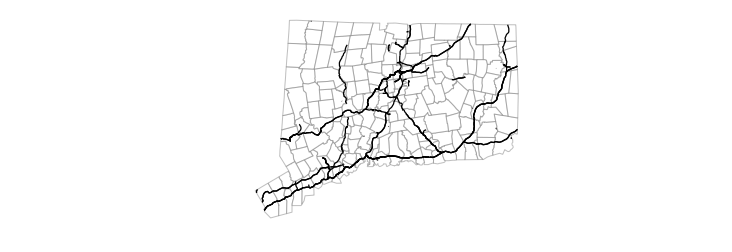

In [55]:
f, ax = plt.subplots(1, figsize=(12,4))
base = cttowns.plot(ax=ax, color='white',edgecolor="gray",alpha=0.5)
primary_roads.plot(ax=base,
            #marker="*", 
            #markersize=1000, 
            alpha=1,
            color='gray', edgecolor='black', linewidth=1.25)
_ = ax.axis('off')
lims = plt.axis('equal') # Fixes distortion issue

plt.show()

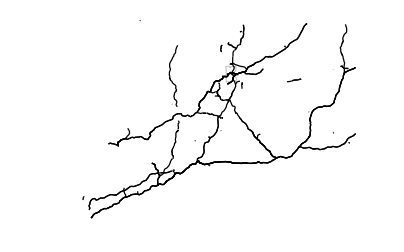

In [142]:
#f, ax = plt.subplots(1, figsize=(12,4))
hartford = cttowns[cttowns["NAME10"] == "Hartford"]
ax = hartford.plot(color='white',edgecolor="gray",alpha=0.5)
primary_roads.plot(ax=ax,
            #marker="*", 
            #markersize=1000, 
            alpha=1,
            color='gray', edgecolor='black', linewidth=1.25)
_ = ax.axis('off')
lims = plt.axis('equal') # Fixes distortion issue

plt.show()

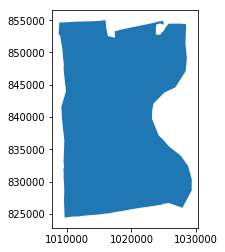

In [141]:
hartford.plot()

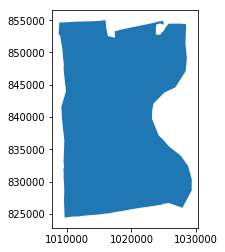

In [134]:
hartford.geometry.plot()

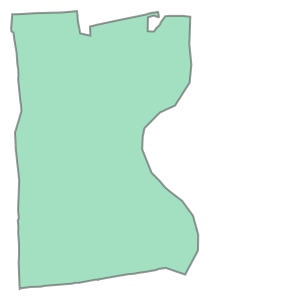

In [207]:
hartford_boundary = cttowns[cttowns["NAME10"]=="Hartford"].iloc[0].geometry
hartford_boundary

In [285]:
def town_shape(town_names):
    if type(town_names) == str:
        town_names = [town_names]

    return cttowns[cttowns["NAME10"].apply(lambda x: x in town_names)]

In [268]:
def town_boundary(town_name):
    return town_shape(town_name).iloc[0].geometry

['Bethel']


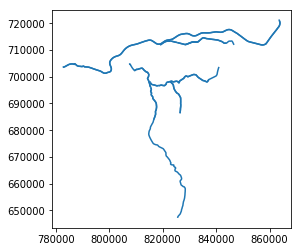

In [269]:
ctroads[ctroads.geometry.intersects(town_boundary("Bethel"))].plot()

['Bethel']
['Bethel']


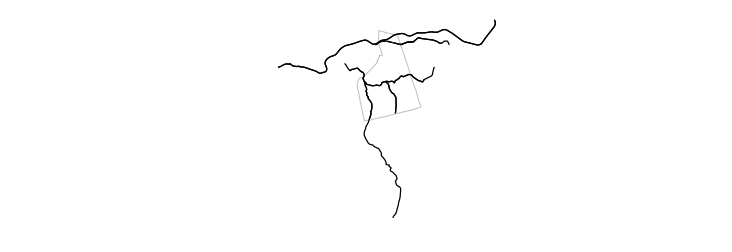

In [270]:
from shapely import wkt, geometry

def town_roadmap(town_name):
    tr = ctroads[ctroads.geometry.intersects(town_boundary("Bethel"))]
    ts = town_shape("Bethel")#.plot()
        
    f, ax = plt.subplots(1, figsize=(12,4))
    base = ts.plot(ax=ax, color='white',edgecolor="gray",alpha=0.5)
    tr.plot(ax=base,
            #marker="*", 
            #markersize=1000, 
            alpha=1,
            color='gray', edgecolor='black', linewidth=1.25)
    _ = ax.axis('off')
    lims = plt.axis('equal') # Fixes distortion issue

    plt.show()

town_roadmap("Bethel")

In [271]:
help(ctroads.geometry.contains)

Help on method contains in module geopandas.base:

contains(self, other) method of geopandas.geoseries.GeoSeries instance
    Return True for all geometries that contain *other*, else False



### Fail, fixed below

The town_roadmap function above makes is silly. It includes the entire road that touches the town, rather than just the portion of the road inside the town. The solution below works.

In [313]:
def town_roadmap(town_name):
    
    plt.close()
    
    ts = town_shape([town_name])
    
    # Solution here: https://github.com/geopandas/geopandas/issues/398
    tr = ctroads.intersection(ts.unary_union)

        
    #res_union = gpd.overlay(tr, ts, how='union')
    #ax = res_union.plot(alpha=0.5)
    ax = tr.plot(color='black', alpha=0.5)
    _ = ax.axis("off")
    
    ax.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    ts.plot(ax=ax, color='lightgray', alpha=0.5)
    plt.tight_layout()
    plt.savefig("roadmaps/"+town_name +".png",bbox_inches="tight")
    plt.close()

    
town_roadmap("Bethel")

#plt.gcf().subplots_adjust(hspace=0.0, wspace=0.0)
plt.tight_layout()
plt.savefig("roadmaps/bethel.png",bbox_inches="tight")


<Figure size 600x400 with 0 Axes>

In [314]:
town_roadmap("Hartford")

In [316]:
# You can even do this if you really want
#town_roadmap(["Hartford","Bethel","Greenwich","Brookfield","Colchester","Southington"])

In [320]:
for n in cttowns["NAME10"].unique():
    try:
        town_roadmap(n)
    except Exception as e:
        print ("Error parsing " + n + ": " + str(e))

Error parsing Ellington: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x11aab7050>
Error parsing Stafford: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1177fe1d0>


In [ ]:
cttowns["NAME10"].unique()

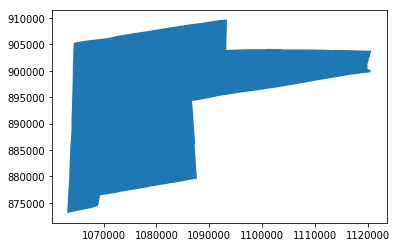

In [322]:
town_shape(["Ellington"]).plot()

# TODO

Figure out why Ellington and Stafford are failing

In [324]:
town_roadmap("Ellington")

TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x1190943d0>